In [1]:
import pandas as pd
csv_df = pd.read_csv('/Users/jobandtalent/Documents/GitHub/Practical-Data-Science-with-Python/4-Chapter-4/data/itunes_data.csv', dtype = {'bytes': int})
csv_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [2]:
excel_df = pd.read_excel('/Users/jobandtalent/Documents/GitHub/Practical-Data-Science-with-Python/4-Chapter-4/data/itunes_data.xlsx', engine = 'openpyxl')
excel_df.head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,My Time After Awhile,Robert Geddins/Ron Badger/Sheldon Feinberg,182491,6022698,0.99,Blues,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy
1,Be Quick Or Be Dead,Bruce Dickinson/Janick Gers,204512,8181888,0.99,Rock,Fear Of The Dark,Iron Maiden
2,Água E Fogo,Chico Amaral/Edgard Scandurra/Samuel Rosa,278987,9272272,0.99,Rock,Maquinarama,Skank
3,Ozone Baby,"Jimmy Page, Robert Plant",215954,7079588,0.99,Rock,Coda,Led Zeppelin
4,Bop Boogie,NaN,189596,6093124,0.99,Jazz,Up An' Atom,Gene Krupa


In [3]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///chinook.db')

In [4]:
import pandas as pd
query = """
SELECT tracks.name as Track,
tracks.composer,
tracks.milliseconds,
tracks.bytes,
tracks.unitprice,
genres.name as Genre,
albums.title as Album,
artists.name as Artist
FROM tracks
JOIN genres ON tracks.genreid = genres.genreid
JOIN albums ON tracks.albumid = albums.albumid
JOIN artists ON albums.artistid = artists.artistid;
"""
with engine.connect() as connection: 
    sql_df = pd.read_sql_query(query, connection)

In [5]:
sql_df.head(2).T

,0,1
Track,For Those About To Rock (We Salute You),Put The Finger On You
Composer,"Angus Young, Malcolm Young, Brian Johnson","Angus Young, Malcolm Young, Brian Johnson"
Milliseconds,343719,205662
Bytes,11170334,6713451
UnitPrice,0.99,0.99
Genre,Rock,Rock
Album,For Those About To Rock We Salute You,For Those About To Rock We Salute You
Artist,AC/DC,AC/DC


In [6]:
sql_df.index

RangeIndex(start=0, stop=3503, step=1)

In [7]:
sql_df.columns

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist'],
      dtype='object')

In [8]:
type(sql_df)

pandas.core.frame.DataFrame

In [9]:
itunes_df = pd.concat([csv_df, excel_df, sql_df])

In [10]:
itunes_df.head()


,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos


In [11]:
itunes_df.tail()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [12]:
print(excel_df.index)
print(csv_df.index)
print(sql_df.index)

RangeIndex(start=0, stop=215, step=1)
RangeIndex(start=0, stop=303, step=1)
RangeIndex(start=0, stop=3503, step=1)


In [13]:
print(itunes_df.iloc[0])
print(itunes_df.iloc[-1])

Track           All the Best Cowboys Have Daddy Issues
Composer                                           NaN
Milliseconds                                   2555492
Bytes                                        211743651
UnitPrice                                         1.99
Genre                                         TV Shows
Album                                   Lost, Season 1
Artist                                            Lost
Name: 0, dtype: object
Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 350

In [14]:
print(itunes_df.iloc[0,0])
print(itunes_df.iloc[-1,-1])

All the Best Cowboys Have Daddy Issues
Philip Glass Ensemble


In [15]:
print(itunes_df.loc[3502])

Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 3502, dtype: object


In [16]:
test_df = itunes_df.copy()
test_df = test_df.append(itunes_df.loc[3502])
test_df.loc[3502]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [17]:
test_df.reset_index(inplace = True, drop = True)

In [18]:
print(itunes_df.shape)

(4021, 8)


In [19]:
itunes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  4021 non-null   int64  
 3   Bytes         4021 non-null   int64  
 4   UnitPrice     4021 non-null   float64
 5   Genre         4021 non-null   object 
 6   Album         4021 non-null   object 
 7   Artist        4021 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 411.8+ KB


In [20]:
itunes_df.isna().sum()

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

In [21]:
itunes_df.describe()

,Milliseconds,Bytes,UnitPrice
count,4.021000e+03,4.021000e+03,4021.000000
mean,3.927276e+05,3.311048e+07,1.050184
std,5.337745e+05,1.042268e+08,0.237857
min,1.071000e+03,3.874700e+04,0.990000
25%,2.069680e+05,6.372433e+06,0.990000
50%,2.554770e+05,8.102839e+06,0.990000
75%,3.217240e+05,1.025143e+07,0.990000
max,5.286953e+06,1.059546e+09,1.990000


In [22]:
itunes_df['Genre'].value_counts()[:5]

Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Name: Genre, dtype: int64

In [23]:
itunes_df['Genre'].unique().shape

(25,)

In [24]:
itunes_df.corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.957791,0.934829
Bytes,0.957791,1.000000,0.938734
UnitPrice,0.934829,0.938734,1.000000


In [25]:
import matplotlib.pyplot as plt

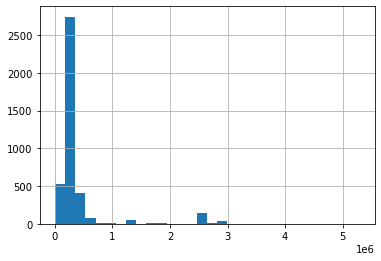

In [26]:
itunes_df['Milliseconds'].hist(bins=30)
plt.show()

array([[<AxesSubplot:title={'center':'Milliseconds'}>,
        <AxesSubplot:title={'center':'Bytes'}>]], dtype=object)

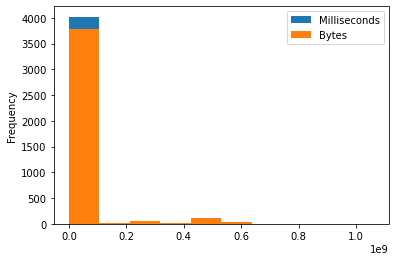

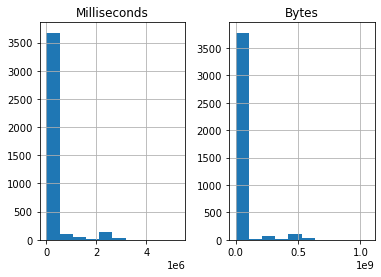

In [27]:
itunes_df[['Milliseconds', 'Bytes']].plot.hist()
itunes_df[['Milliseconds', 'Bytes']].hist()

<AxesSubplot:xlabel='Milliseconds', ylabel='Bytes'>

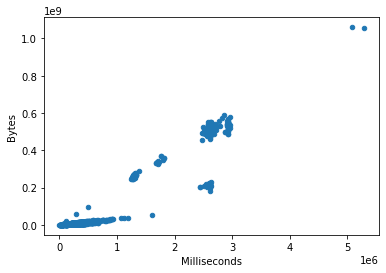

In [28]:
itunes_df.plot.scatter(x='Milliseconds', y = 'Bytes')

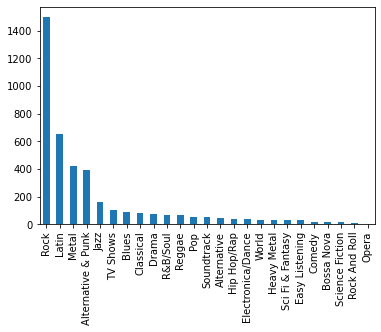

In [29]:
itunes_df['Genre'].value_counts().plot.bar()
plt.show()

In [30]:
itunes_df[itunes_df['Milliseconds'] > 4e6]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2833,Occupation / Precipice,None,5286953,1054423946,1.99,TV Shows,"Battlestar Galactica, Season 3",Battlestar Galactica
2898,Through a Looking Glass,None,5088838,1059546140,1.99,Drama,"Lost, Season 3",Lost


In [31]:
itunes_df[itunes_df['Milliseconds'] > 2e6]['Genre'].value_counts()

Drama               69
TV Shows            67
Sci Fi & Fantasy    31
Science Fiction     15
Comedy               2
Name: Genre, dtype: int64

In [32]:
itunes_df[(itunes_df['Milliseconds'] > 2e6) & (itunes_df['Bytes'] <0.4e9)]['Genre'].value_counts()

TV Shows    32
Name: Genre, dtype: int64

In [33]:
itunes_df[~(itunes_df['Genre'] == 'TV Shows')]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos
5,Freewheel Burning,NaN,265952,8713599,0.99,Metal,Living After Midnight,Judas Priest
...,...,...,...,...,...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble


In [34]:
itunes_df[itunes_df['Genre'].str.contains('TV')]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
23,Confidence Man,NaN,2615244,223756475,1.99,TV Shows,"Lost, Season 1",Lost
38,Diwali,NaN,1279904,252726644,1.99,TV Shows,"The Office, Season 3",The Office
148,The 23rd Psalm,NaN,2610416,487401604,1.99,TV Shows,"Lost, Season 2",Lost
209,"Lost (Pilot, Part 2)",NaN,2436583,204995876,1.99,TV Shows,"Lost, Season 1",Lost
...,...,...,...,...,...,...,...,...
3210,The Merger,None,1801926,345960631,1.99,TV Shows,"The Office, Season 3",The Office
3253,Pilot,None,2484567,492670102,1.99,TV Shows,Aquaman,Aquaman
3344,Eggtown,None,2608817,501061240,1.99,TV Shows,"LOST, Season 4",Lost
3347,Ji Yeon,None,2588797,506458858,1.99,TV Shows,"LOST, Season 4",Lost


## Removing Irrelevant Data

In [35]:
only_music = itunes_df[~itunes_df['Genre'].isin(['Drama', 'TV Shows', 'Sci Fi & Fantasy', 'Science Fiction', 'Comedy'])]

### Dealing with missing values

In [36]:
itunes_df[itunes_df['Composer'].isna()].sample(5, random_state=42).head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2947,Three Minutes,None,2763666,531556853,1.99,TV Shows,"Lost, Season 2",Lost
98,Romance Ideal,NaN,250070,8260477,0.99,Latin,Arquivo Os Paralamas Do Sucesso,Os Paralamas Do Sucesso
3327,Todo o Carnaval tem seu Fim,None,237426,9499371,0.99,Electronica/Dance,Radio Brasil (O Som da Jovem Vanguarda) - Sele...,O Rappa
2457,We've Got To Get Together/Jingo,None,1070027,34618222,0.99,Rock,Santana Live,Santana
587,Vamos Dançar,None,226194,7617432,0.99,Latin,The Best of Ed Motta,Ed Motta


In [37]:
itunes_df.loc[itunes_df['Composer'].isna(), 'Composer'] = 'Unknown'

In [38]:
itunes_df['UnitPrice'].value_counts()

0.99    3779
1.99     242
Name: UnitPrice, dtype: int64

In [39]:
itunes_df['UnitPrice'].fillna(itunes_df['UnitPrice'].mode(), inplace = True)

In [40]:
import numpy as np 
itunes_df.loc[0, 'Bytes'] = np.nan

In [41]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [42]:
imputed = imputer.fit_transform(itunes_df[['Milliseconds', 'Bytes', 'UnitPrice']])

In [43]:
itunes_df['Bytes'] = imputed[:,1]

In [44]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q1 + (1.5 * iqr)
    lower_boundary = q3 - (1.5 * iqr)
    new_df = df.loc[(df[column]>lower_boundary) & (df[column] < upper_boundary)]
    return new_df

In [45]:
itunes_df_clean = remove_outliers(itunes_df, 'Milliseconds')

In [46]:
itunes_df.duplicated().sum()

516

In [47]:
itunes_df_clean.duplicated().sum()

399

In [48]:
itunes_df.drop_duplicates(inplace=True)
itunes_df_clean.drop_duplicates(inplace=True)

/Users/jobandtalent/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [49]:
itunes_df['Seconds'] = itunes_df['Milliseconds']/1000
itunes_df_clean['Seconds'] = itunes_df_clean['Milliseconds']/1000

/var/folders/r2/x5j47yt92sv773rtp4rf_v000000gn/T/ipykernel_2878/1714245610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itunes_df_clean['Seconds'] = itunes_df_clean['Milliseconds']/1000


In [50]:
itunes_df['byte_len_ratio'] = itunes_df['Bytes'] / itunes_df['Milliseconds']
itunes_df_clean['byte_len_ratio'] = itunes_df_clean['Bytes'] / itunes_df_clean['Milliseconds']

/var/folders/r2/x5j47yt92sv773rtp4rf_v000000gn/T/ipykernel_2878/1991611002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itunes_df_clean['byte_len_ratio'] = itunes_df_clean['Bytes'] / itunes_df_clean['Milliseconds']


In [51]:
genres_dict = {'metal' : 'Metal', 'met': 'Metal'}
itunes_df_clean['Genre'].replace(genres_dict)
itunes_df['Genre'].replace(genres_dict)

0         TV Shows
1            Latin
2            Latin
3           Comedy
4            Latin
           ...    
3496     Classical
3499     Classical
3500     Classical
3501     Classical
3502    Soundtrack
Name: Genre, Length: 3505, dtype: object

In [52]:
itunes_df.groupby('Genre').mean()['Seconds'].sort_values().head()

Genre
Rock And Roll     134.643500
Opera             174.813000
Hip Hop/Rap       178.176286
Easy Listening    189.164208
Bossa Nova        219.590000
Name: Seconds, dtype: float64

In [57]:
btc_df = pd.read_csv(r'/Users/jobandtalent/Documents/GitHub/Practical-Data-Science-with-Python/4-Chapter-4/data/bitcoin_price.csv')
btc_df.head()

,symbol,time,open,close,high,low,volume
0,btcusd,1364688000000,92.500000,93.033000,93.74999,91.00000,3083.079791
1,btcusd,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313
2,btcusd,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3,btcusd,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
4,btcusd,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305


In [59]:
btc_df.drop('symbol',axis = 1, inplace=True)

In [60]:
btc_df['time'] = pd.to_datetime(btc_df['time'], unit = 'ms')

In [61]:
btc_df.set_index('time', inplace=True)

<AxesSubplot:xlabel='time'>

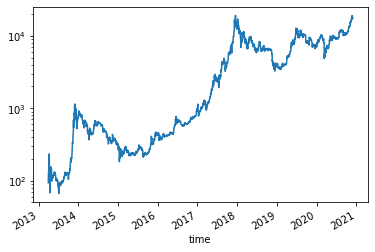

In [62]:
btc_df['close'].plot(logy = True)

In [63]:
btc_df = pd.read_csv(r'/Users/jobandtalent/Documents/GitHub/Practical-Data-Science-with-Python/4-Chapter-4/data/bitcoin_price.csv', index_col = 'time', parse_dates = ['time'], infer_datetime_format= True)

In [64]:
date_parser = lambda x : pd.to_datetime(x, unit = 'ms')
btc_df = pd.read_csv(r'/Users/jobandtalent/Documents/GitHub/Practical-Data-Science-with-Python/4-Chapter-4/data/bitcoin_price.csv', parse_dates= ['time'], date_parser=date_parser)

In [65]:
import numpy as np 
close_list = btc_df['close'].to_list()
close_array = np.array(close_list)

In [66]:
btc_df['market_cap'] = btc_df['close'] * btc_df['volume']